In [200]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.linalg as la
from math import sqrt
import pandas as pd
from pandas import DataFrame
import re
from io import StringIO
%pip install corner
import corner
print("Modules Imported!")

You should consider upgrading via the '/Users/rishishah02/miniforge3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Modules Imported!


# Linear Regression
In this lab we will apply linear regression to real and synthetic data and study Stochastic Gradient Descent.

For matrix inversion, we will use [`numpy.linalg`](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html), which we imported with  
``` python
import numpy.linalg as la
```
You will find [`numpy.linalg.inv`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html), [`numpy.transpose`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.transpose.html), and [`numpy.dot`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.dot.html) useful.

## Estimating Box Office Gross
(20 pts) We will use opening weekend gross to estimate total gross based on data for 2017 (until mid september). **Execute the last cell in this notebook.** Then we use `pandas` to read the data provided in the last cell in to an object called a dataframe. (`pandas` can do a lot of other things too.) 
We **use pandas as**:
```
df = pd.read_csv(data_csv,delimiter=',')
```
The command can also take other arguments. For example, if the names of the columns are not given in the file, we can use `names=[...]` or we can set the delimiter to be any whitespace instead of just comma with `delim_whitespace=True`, as shown below:
```
df = pd.DataFrame(raw_data, names = ['first_name', 'last_name', 'age', 'education','income'], delim_whitespace=True)
```
We then print the first few rows to check that everything has loaded properly, and check the data type for each column.

In [202]:
df = pd.read_csv(data_csv,delimiter=',')
df.head() # The first few rows of the dataframe

,Rank,MovieTitle,Studio,TotalGross,Theaters,OpeningGross,OpeningTheaters,OpenDate
0,1,Beauty and the Beast (2017),BV,"$504,014,165",4210,"$174,750,616",4210,14-Apr
1,2,Wonder Woman,WB,"$411,600,007",4165,"$103,251,471",4165,23-Jun
2,3,Guardians of the Galaxy Vol. 2,BV,"$389,810,502",4347,"$146,510,104",4347,9-Jun
3,4,Spider-Man: Homecoming,Sony,"$330,644,416",4348,"$117,027,503",4348,14-Apr
4,5,Despicable Me 3,Uni.,"$261,242,325",4535,"$72,434,025",4529,3-Mar


In [203]:
df.dtypes

Rank                int64
MovieTitle         object
Studio             object
TotalGross         object
Theaters            int64
OpeningGross       object
OpeningTheaters     int64
OpenDate           object
dtype: object

___
Next we extract data from the dataframe. Our input variable is the Openning Gross and our output is Total Gross. The data needs some preprocessing.

In [204]:
Y = df[['TotalGross']].values # extract grosses
# remove ',' and '$' and convert to float
# Y is a two dimensional array, so we use a two for loops
for i in range(np.shape(Y)[0]): 
    for j in range(np.shape(Y)[1]):
        Y[i,j] = float(re.sub('[$,]','',Y[i,j])) 
Y = Y.astype(float)


X = df[['OpeningGross']].values # if we need multiple columns we can write, e.g., X = df[['OpeningGross','Theaters']].values
for i in range(np.shape(X)[0]):
    for j in range(np.shape(X)[1]):
        X[i,j] = float(re.sub('[$,]','',X[i,j])) # remove ',' and '$' and convert to float
X = X.astype(float)

___
1. Plot the input and output in a scatter plot.
2. Find $\hat\theta$ minimizing the square error.
3. Find the Root Mean Square Error (RMSE),
$$
\sqrt{\frac1n\sum_{i=1}^n(y_i-\mathbf{x}_i^T{\boldsymbol{\hat\theta}})^2}.
$$
4. Plot the line $X\hat\theta$ on the same plot as the input-output data.


theta_hat = 2.8141958004958743
RMSE = 11374370.777137922


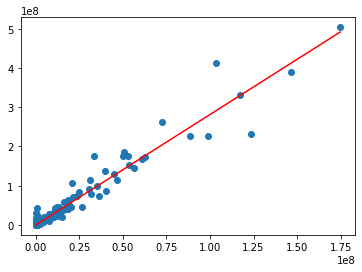

In [205]:
# Begin solution
plt.scatter(X,Y)
thetahat = np.matmul(la.inv(np.matmul(X.T, X)), np.matmul(X.T, Y))
print("theta_hat =", thetahat[0][0])
Yhat = X*thetahat
rmse = sqrt(np.mean(np.square(Y-Yhat)))
print("RMSE =", rmse)
plt.plot(X, Yhat, color = "red")
plt.show()
# End solution

## Regression with synthetic data
(30 pts) This time we will use synthetic data. The data will be multivariate normal and so minimizing square error is the same as maximum likelihood estimation.

Generate a samples $\left\{(\mathbf{x}_1,y_1),\dotsc,(\mathbf{x}_{N},y_{N})\right\}$ of size $N=100$, where $$\mathbf{x}_i\sim \mathcal N (\boldsymbol{\mu},K),$$ with mean $\boldsymbol{\mu}=[0,0]^T$ and covariance $$
K=\left[\begin{array}{cc}
10 & 5\\
5 & 10\\
\end{array}\right],$$ and 
$$
y_i \sim \mathcal N(\boldsymbol{\theta}^T \mathbf{x}_i,\sigma^2)$$ with
$$
\boldsymbol{\theta}=\left[\begin{array}{c}
3 \\
-1\\
\end{array}\right]$$
and 
$$\sigma^2=1.$$

Arrange these in two matrices $X$ and $\mathbf{y}$ of sizes $100\times2$ and $100\times1$, respectively.

In [211]:
# Begin solution
mu = np.array([0,0]).T
K = np.array([[10, 5],[5, 10]])
X = np.random.multivariate_normal(mu, K, size = 100)
theta = np.array([3, -1]).T
sig2 = 1
y = []
#np.random.normal(np.matmul(theta.T,X[0]), sig2)
for x in X:
    y.append(np.random.normal(np.matmul(theta.T,x), sig2))
y = np.array(y)
# End Solution

### Maximum Likelihood
Find the maximum likelihood estimate $\hat\theta$ of $\theta$, and compare with true value. Find the RMSE.

In [212]:
# Begin solution
mle = np.matmul(la.inv(np.matmul(X.T, X)), np.matmul(X.T, y))
#print(mle)
Yhat = np.matmul(X,mle)
rmse = sqrt(np.mean(np.square(y-Yhat)))
print("theta_MLE =", mle.T)
print("RMSE =", rmse)
# End solution

theta_MLE = [ 3.0144061  -0.94956207]
RMSE = 0.9884740704424245


### Bayesian Regression
Now let us consider the Bayesian approach. As discussed in class this is more difficult to do analytically so we take a **sampling approach**, i.e., *instead of finding the posterior distribution for $\boldsymbol{\theta}$ explicitly, we generate samples from this distribution.* Provided that the number of samples is large, we can answer questions using samples.

We assume the prior $$ p(\boldsymbol{\theta},\sigma^2)\propto 1/\sigma^2.$$ To generate posterior samples from $p(\boldsymbol{\theta},\sigma^2|\mathbf{y})$, we first generate samples from $p(\sigma^2|\mathbf{y})$ and then for each such sample for $\sigma^2$, we generate a sample for $\boldsymbol{\theta}$ according to $p(\boldsymbol{\theta}|\mathbf{y},\sigma^2)$. Finally, note that to generate a sample from a scaled-inverse-$\chi^2$ with parameters $(k,s^2)$, we can generate a sample $z$ from $\chi^2$ with parameter $k$ (degree of freedom) and then output $\frac{ks^2}{z}$. 

Generate two matrices of samples `sigma2samples` and `thetasamples` of sizes 500x1 and 500x2, for $\boldsymbol{\theta}$ and $\sigma^2$, respectively and use the provided code to find the posterior means and histograms.

Bayesian theta point estimate (mean)= [ 3.07251538 -0.96342087]
Bayesian sigma2 point estimate (mean)= 1.0563763100907082


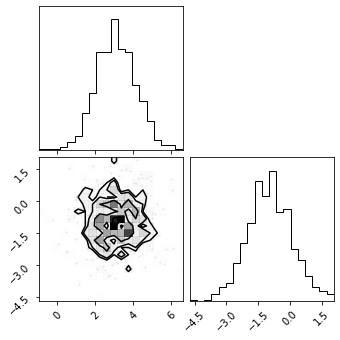

In [217]:
# Begin Solution
n = 100
m = 2
N = 500
y-np.matmul(X, theta)
s2 = (np.dot((y-np.matmul(X, theta)).T,(y-np.matmul(X, theta))))/(n-m)
sigma2samples = ((n-m)*s2)/np.random.chisquare(n-m, N)
thetasamples = []
for s in sigma2samples:
    thetasamples.append(np.random.normal(np.matmul(la.inv(np.matmul(X.T, X)), np.matmul(X.T, y)), s))
thetasamples = np.array(thetasamples)
# End Solution
print("Bayesian theta point estimate (mean)=",np.mean(thetasamples,axis=0))
print("Bayesian sigma2 point estimate (mean)=",np.mean(sigma2samples))
corner.corner(thetasamples);

## Stochastic Gradient Descent for ML
(20 pts)

### Finding the root: The basic case
Suppose that we want to solve the equation $$f(\theta)=0,$$ which we know to have a unique solution $\theta^*$ such that $f(\theta)$ is increasing at this solution. One way to find this solution is to start with an arbitrary $\theta_0$ and let 
$$
\theta_{t} = \theta_{t-1} - a_t f(\theta_{t-1}),
$$
where $a_t$ satisfies 
$$\sum_{t=1}^\infty a_t = \infty,\quad \sum_{t=1}^\infty a_t^2 < \infty.$$
For example, we may let $a_t=\frac1t$. It can be shown that $\theta_t$ converges to $\theta^*$.

___
Consider the function $f(\theta)=\arctan \theta -1$ and let $\theta_0=0$. Use the method described above to find $\theta^*$ such that $f(\theta^*)=0$. Set the number of iterations to 1000. Plot the values of $\theta_t$ and compare $\theta_{1000}$ with $\theta^*$. Let $a_t=\frac1{t^{3/4}}$.

Bonus: It is also interesting to see how the behavior changes with $a_t=\frac1{t^r}$ for different values of $r$.

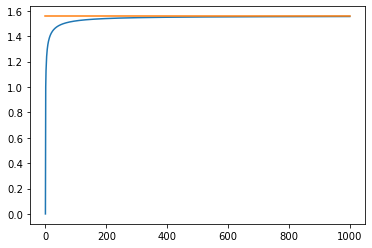

In [142]:
def f(theta):
    return np.arctan(theta) - 1

# Begin solution:
r = .75
def a(t):
    return 1/(t**r)
n = 1000
theta = [0]
for t in range(1, n):
    theta.append(theta[t-1] - a(t)*f(theta[t-1]))
plt.plot(theta)
plt.plot([np.tan(1)]*n)
plt.show()
# End Solution

### Finding the root with noisy observations ###
Importantly, this method works even if we can't actually compute $f(\theta)$ but instead can obtain $F(\theta)$, which is a noisy version of $f(\theta)$ such that
$$
f(\theta)=E[F(\theta)].
$$
In this case, we let 
$$
\theta_t = \theta_{t-1} - a_t F(\theta_{t-1}),
$$
and again $\theta_t$ converges to $\theta^*$.
___
To see this in action, this time, you are provided with $F(\theta)=f(\theta) + Z = \arctan \theta - 1 + Z$, where $Z\sim \mathcal N(0,1)$. 

Start with $\theta_0=0$ and plot the values of $\theta_t$ and compare $\theta_{1000}$ with $\theta^*$. Let $a_t=\frac1{t^{3/4}}$.

Bonus: It is also interesting to see how the behavior changes with $a_t=\frac1{t^r}$ for different values of $r$.

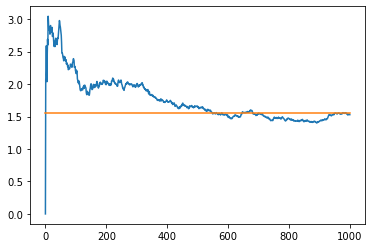

In [144]:
def F(theta):
    return np.arctan(theta) - 1 + st.norm.rvs()

# Begin solution:
r = .75
def a(t):
    return 1/(t**r)
n = 1000
theta = [0]
for t in range(1, n):
    theta.append(theta[t-1] - a(t)*F(theta[t-1]))
plt.plot(theta)
plt.plot([np.tan(1)]*n)
plt.show()
# End Solution

### Stochastic Gradient Descent ###
Now consider two random variables $x$ and $y$ and suppose that we have $N$ samples: $\{(x_1,y_1),(x_2,y_2),\dotsc,(x_N,y_N)\}$. Our goal is linear regression of $y$ with respect to $x$ as $y = \theta^T x$, using stochastic gradient descent as discussed in class.

In the context of linear regression, this method is refered to as _Least Mean Square_ or _LMS_ (which isn't a very good name). In SGD, you choose random data points and it is ok to choose some data points multiple times.
___
Set $\theta_0=(0,0)$ and let
$$
\theta_{t+1}=\theta_{t} + \frac{1}{(t+10)} (y_i-\theta_t^Tx_i)x_i,
$$
for $t=1,\dotsc,200$, where $i$ is a random index indicating which data point is used in this step. Use data generated in **Regression-with-synthetic-data**. Note that $\theta_t$ and $x_i$ are two-dimensional. Plot both elements of $\theta_t$ and compare them with the true values of [3,-1].

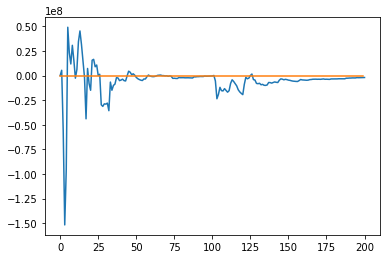

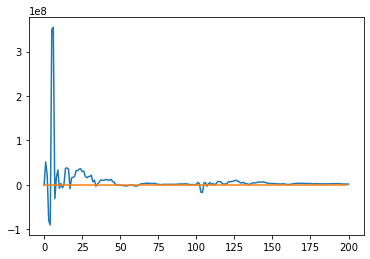

In [159]:
# Begin solution:
def a(t):
    return 1/(t+10)
n = 200
theta = np.array([3, -1]).T
thetas = [np.array([0,0])]
for t in range(0, n):
    thetas.append(thetas[t] + a(t)*(Y[t%100]-np.matmul(thetas[t].T,X[t%100]))*X[t%100])
df = pd.DataFrame(thetas)
plt.plot(df[0])
plt.plot([theta[0]]*n)
plt.show()
plt.plot(df[1])
plt.plot([theta[1]]*n)
plt.show()

# End Solution

In [201]:
data_csv = StringIO('''Rank,MovieTitle,Studio,TotalGross,Theaters,OpeningGross,OpeningTheaters,OpenDate
1,Beauty and the Beast (2017),BV,"$504,014,165 ",4210,"$174,750,616 ",4210,14-Apr
2,Wonder Woman,WB,"$411,600,007 ",4165,"$103,251,471 ",4165,23-Jun
3,Guardians of the Galaxy Vol. 2,BV,"$389,810,502 ",4347,"$146,510,104 ",4347,9-Jun
4,Spider-Man: Homecoming,Sony,"$330,644,416 ",4348,"$117,027,503 ",4348,14-Apr
5,Despicable Me 3,Uni.,"$261,242,325 ",4535,"$72,434,025 ",4529,3-Mar
6,It,WB (NL),"$232,406,627 ",4148,"$123,403,419 ",4103,10-Feb
7,Logan,Fox,"$226,277,068 ",4071,"$88,411,916 ",4071,12-Sep
8,The Fate of the Furious,Uni.,"$225,764,765 ",4329,"$98,786,705 ",4310,10-Feb
9,Dunkirk,WB,"$185,580,747 ",4014,"$50,513,488 ",3720,12-May
10,The LEGO Batman Movie,WB,"$175,750,384 ",4088,"$53,003,468 ",4088,3-Mar
11,Get Out,Uni.,"$175,484,140 ",3143,"$33,377,060 ",2781,7-Apr
12,The Boss Baby,Fox,"$174,979,567 ",3829,"$50,198,902 ",3773,2-Jun
13,Pirates of the Caribbean: Dead Men Tell No Tales,BV,"$172,553,070 ",4276,"$62,983,253 ",4276,9-Jun
14,Kong: Skull Island,WB,"$168,052,812 ",3846,"$61,025,472 ",3846,28-Jul
15,Cars 3,BV,"$152,311,351 ",4256,"$53,688,680 ",4256,7-Apr
16,War for the Planet of the Apes,Fox,"$145,960,898 ",4100,"$56,262,929 ",4022,15-Mar
17,Split,Uni.,"$138,141,585 ",3373,"$40,010,975 ",3038,23-Jun
18,Transformers: The Last Knight,Par.,"$130,168,683 ",4132,"$44,680,073 ",4069,12-May
19,Girls Trip,Uni.,"$114,527,660 ",2648,"$31,201,920 ",2591,20-Jan
20,Fifty Shades Darker,Uni.,"$114,434,010 ",3714,"$46,607,250 ",3710,14-Apr
21,Baby Driver,TriS,"$107,183,414 ",3226,"$20,553,320 ",3226,10-Mar
22,Annabelle: Creation,WB (NL),"$100,235,306 ",3565,"$35,006,404 ",3502,14-Apr
23,John Wick: Chapter Two,LG/S,"$92,029,184 ",3113,"$30,436,123 ",3113,13-Jan
24,Power Rangers (2017),LGF,"$85,364,450 ",3693,"$40,300,288 ",3693,27-Jan
25,The Emoji Movie,Sony,"$84,075,310 ",4075,"$24,531,923 ",4075,2-Jun
26,The Mummy (2017),Uni.,"$80,101,125 ",4035,"$31,688,375 ",4035,5-May
27,Alien: Covenant,Fox,"$74,262,031 ",3772,"$36,160,621 ",3761,10-Mar
28,Captain Underpants: The First Epic Movie,Fox,"$73,820,839 ",3529,"$23,851,539 ",3434,30-Jun
29,The Hitman's Bodyguard,LG/S,"$71,472,990 ",3377,"$21,384,504 ",3377,28-Jul
30,A Dog's Purpose,Uni.,"$64,321,890 ",3178,"$18,222,810 ",3059,21-Jul
31,Baywatch,Par.,"$58,060,186 ",3647,"$18,503,871 ",3647,18-Aug
32,The Shack,LG/S,"$57,386,418 ",2888,"$16,172,119 ",2888,28-Jul
33,Atomic Blonde,Focus,"$51,435,785 ",3326,"$18,286,420 ",3304,7-Apr
34,The Dark Tower,Sony,"$50,108,271 ",3451,"$19,153,698 ",3451,14-Apr
35,Snatched,Fox,"$45,852,178 ",3511,"$19,542,248 ",3501,4-Aug
36,The Great Wall,Uni.,"$45,157,105 ",3328,"$18,469,620 ",3326,19-May
37,Smurfs: The Lost Village,Sony,"$45,020,282 ",3610,"$13,210,449 ",3610,27-Jan
38,Going in Style (2017),WB (NL),"$45,018,541 ",3076,"$11,932,330 ",3061,11-Aug
39,All Eyez on Me,LG/S,"$44,922,302 ",2471,"$26,435,354 ",2471,27-Jan
40,xXx: The Return of Xander Cage,Par.,"$44,898,413 ",3651,"$20,130,142 ",3651,28-Apr
41,47 Meters Down,ENTMP,"$44,240,782 ",2471,"$11,205,561 ",2270,11-Aug
42,The Big Sick,LGF,"$42,574,927 ",2597,"$421,577 ",5,10-Mar
43,Ghost in the Shell (2017),Par.,"$40,563,557 ",3440,"$18,676,033 ",3440,3-Mar
44,Valerian and the City of a Thousand Planets,STX,"$40,470,894 ",3553,"$17,007,624 ",3553,28-Jun
45,King Arthur: Legend of the Sword,WB,"$39,175,066 ",3702,"$15,371,270 ",3702,24-Mar
46,"Everything, Everything",WB,"$34,121,140 ",2801,"$11,727,390 ",2801,26-Jul
47,Monster Trucks,Par.,"$33,370,166 ",3119,"$10,950,705 ",3119,5-May
48,Fist Fight,WB (NL),"$32,187,017 ",3185,"$12,201,873 ",3185,21-Jul
49,How to be a Latin Lover,PNT,"$32,149,404 ",1203,"$12,252,439 ",1118,14-Jul
50,Kidnap (2017),Aviron,"$30,457,042 ",2418,"$10,016,323 ",2378,7-Apr
51,Underworld: Blood Wars,SGem,"$30,353,973 ",3070,"$13,688,751 ",3070,2-Jun
52,Life (2017),Sony,"$30,234,022 ",3146,"$12,501,936 ",3146,11-Aug
53,Wind River,Wein.,"$30,119,807 ",2890,"$161,558 ",4,10-May
54,The Nut Job 2: Nutty by Nature,ORF,"$28,159,991 ",4003,"$8,342,311 ",4003,21-Apr
55,Rings,Par.,"$27,793,018 ",2931,"$13,002,632 ",2931,10-Mar
56,Logan Lucky,BST,"$27,131,135 ",3031,"$7,600,036 ",3031,31-Mar
57,Resident Evil: The Final Chapter,SGem,"$26,830,068 ",3104,"$13,601,682 ",3104,2-Jun
58,The House,WB (NL),"$25,584,504 ",3134,"$8,724,795 ",3134,31-Mar
59,Gifted,FoxS,"$24,801,212 ",2215,"$446,380 ",56,24-Feb
60,The Bye Bye Man,STX,"$22,395,806 ",2220,"$13,501,349 ",2220,11-Aug
61,Rough Night,Sony,"$22,105,643 ",3162,"$8,004,283 ",3162,9-Aug
62,Sleepless,ORF,"$20,783,704 ",1803,"$8,344,128 ",1803,7-Jul
63,Diary of a Wimpy Kid: The Long Haul,Fox,"$20,738,724 ",3174,"$7,126,084 ",3157,26-Apr
64,The Circle (2017),STX,"$20,497,844 ",3163,"$9,034,148 ",3163,21-Jul
65,Baahubali 2: The Conclusion,GrtIndia,"$20,186,659 ",425,"$10,430,497 ",425,17-Mar
66,Leap!,Wein.,"$19,071,001 ",2705,"$4,730,038 ",2575,2-Jun
67,American Assassin,LGF,"$19,019,422 ",3154,"$14,846,778 ",3154,1-Feb
68,CHiPs,WB,"$18,600,152 ",2464,"$7,722,802 ",2464,30-Jun
69,Home Again,ORF,"$18,544,017 ",3036,"$8,567,881 ",2940,28-Jul
70,The Zookeeper's Wife,Focus,"$17,445,186 ",1057,"$3,288,835 ",541,5-May
71,The Glass Castle,LGF,"$16,878,553 ",1461,"$4,678,548 ",1461,28-Jul
72,Detroit,Annapurna,"$16,762,682 ",3007,"$350,190 ",20,14-Jun
73,The Case for Christ,PFR,"$14,682,684 ",1386,"$3,967,885 ",1174,20-Jan
74,Wish Upon,BG,"$14,271,046 ",2250,"$5,467,084 ",2250,2-Jun
75,It Comes At Night,A24,"$13,985,117 ",2533,"$5,988,370 ",2533,18-Aug
76,Born in China,BV,"$13,873,211 ",1508,"$4,790,367 ",1508,7-Apr
77,Megan Leavey,BST,"$13,406,883 ",1956,"$3,810,867 ",1956,11-Aug
78,The Founder,Wein.,"$12,786,053 ",1115,"$3,404,102 ",1115,1-Sep
79,Before I Fall,ORF,"$12,241,122 ",2346,"$4,690,214 ",2346,21-Apr
80,Unforgettable (2017),WB,"$11,368,012 ",2417,"$4,785,431 ",2417,28-Apr
81,The Beguiled (2017),Focus,"$10,576,669 ",941,"$229,292 ",4,28-Jul
82,The Belko Experiment,BH Tilt,"$10,166,820 ",1341,"$4,137,230 ",1341,25-May
83,mother!,Par.,"$9,620,398 ",2368,"$7,534,673 ",2368,1-Mar
84,Rock Dog,LG/S,"$9,420,546 ",2077,"$3,704,749 ",2077,28-Jul
85,The Lost City of Z,BST,"$8,580,410 ",866,"$110,175 ",4,30-Jun
86,The Promise (2017),ORF,"$8,224,288 ",2251,"$4,095,718 ",2251,3-Feb
87,A Cure for Wellness,Fox,"$8,106,986 ",2704,"$4,356,941 ",2704,28-Jul
88,The Space Between Us,STX,"$7,885,294 ",2812,"$3,775,596 ",2812,28-Apr
89,Gold,Wein.,"$7,227,038 ",2166,"$3,471,316 ",2166,13-Jan
90,I am Not Your Negro,Magn.,"$7,123,919 ",320,"$686,378 ",43,24-Mar
91,Beatriz At Dinner,RAtt.,"$7,098,050 ",683,"$141,959 ",5,21-Apr
92,Birth of the Dragon,BH Tilt,"$6,871,070 ",1633,"$2,702,430 ",1618,21-Jul
93,Lowriders,BH Tilt,"$6,179,955 ",365,"$2,403,885 ",295,14-Apr
94,Maudie,SPC,"$6,076,109 ",233,"$45,920 ",4,17-Mar
95,Paris Can Wait,SPC,"$5,614,139 ",447,"$98,850 ",4,24-Feb
96,All Saints,Sony,"$5,396,086 ",846,"$1,514,278 ",846,1-Sep
97,Your Name.,FUN,"$5,017,246 ",311,"$1,813,781 ",311,14-Jul
98,The Book of Henry,Focus,"$4,288,104 ",650,"$1,424,540 ",579,7-Jul
99,The Hero,Orch.,"$4,074,662 ",447,"$45,317 ",4,25-Aug
100,Sleight,BH Tilt,"$3,930,990 ",591,"$1,701,785 ",565,5-May
101,A United Kingdom,FoxS,"$3,902,185 ",317,"$66,510 ",4,27-Jan
102,Norman: The Moderate Rise and Tragic Fall of a New York Fixer,SPC,"$3,814,868 ",373,"$99,211 ",5,7-Jul
103,Table 19,FoxS,"$3,614,896 ",868,"$1,597,928 ",868,19-May
104,Their Finest,STX,"$3,603,484 ",330,"$76,197 ",4,2-Jun
105,Phoenix Forgotten,CLF,"$3,600,146 ",1626,"$1,816,499 ",1626,17-Mar
106,An Inconvenient Sequel: Truth to Power,Par.,"$3,496,795 ",556,"$124,823 ",4,16-Jun
107,Raees,Zee,"$3,262,954 ",265,"$1,798,379 ",265,2-Jun
108,Close Encounters of the Third Kind (40th Anniversary),Sony,"$3,077,585 ",901,"$1,767,758 ",901,11-Aug
109,Colossal,Neon,"$3,029,287 ",327,"$120,226 ",4,18-Aug
110,Ingrid Goes West,Neon,"$2,909,641 ",647,"$135,301 ",3,10-Jan
111,Ballerina (2017) [Canada Only],EOne,"$2,844,490 ",237,"$181,091 ",77,23-Jun
112,The Oscar Nominated Short Films 2017,Shrts.,"$2,835,355 ",272,"$692,399 ",206,4-Aug
113,Kedi,Osci.,"$2,810,235 ",130,"$40,103 ",1,14-Apr
114,My Cousin Rachel,FoxS,"$2,716,368 ",531,"$969,941 ",523,14-Apr
115,Wolf Warrior 2,HC,"$2,711,906 ",53,"$219,022 ",53,17-Feb
116,Mayweather vs. McGregor,Fathom,"$2,620,183 ",532,"$2,620,183 ",532,9-Mar
117,Newsies: The Broadway Musical,Fathom,"$2,545,060 ",780,"$1,333,538 ",780,3-Mar
119,The Salesman,Cohen,"$2,402,067 ",115,"$71,078 ",3,4-Aug
120,T2: Trainspotting,TriS,"$2,402,004 ",331,"$170,575 ",5,23-May
121,Hazlo Como Hombre (Do It Like An Hombre),PNT,"$2,398,251 ",382,"$1,174,484 ",382,21-Jul
122,The Resurrection of Gavin Stone,BH Tilt,"$2,303,792 ",890,"$1,206,771 ",890,18-Aug
123,Tulip Fever,Wein.,"$2,291,801 ",772,"$1,158,017 ",765,8-Jun
124,Collide,ORF,"$2,280,004 ",2045,"$1,512,824 ",2045,21-Jul
125,The Lovers,A24,"$2,194,521 ",443,"$66,286 ",4,5-May
126,Un Padre No Tan Padre,PNT,"$2,156,047 ",312,"$978,894 ",312,30-Jun
127,Badrinath Ki Dulhania,FIP,"$1,993,259 ",156,"$862,008 ",152,1-Feb
128,Good Time,A24,"$1,947,857 ",721,"$125,101 ",4,25-Aug
129,Everybody Loves Somebody,PNT,"$1,915,789 ",333,"$924,201 ",333,7-Apr
130,A Quiet Passion,MBox,"$1,865,396 ",135,"$45,825 ",6,20-Jan
131,Toilet: Ek Prem Katha,Relbig.,"$1,830,715 ",178,"$678,436 ",178,12-Jul
132,The Wall,RAtt.,"$1,803,064 ",540,"$897,955 ",540,6-Jan
133,Free Fire,A24,"$1,799,312 ",1070,"$994,431 ",1070,12-May
135,The Last Word,BST,"$1,783,421 ",380,"$31,630 ",4,5-Aug
136,Slamma Jamma,RivR,"$1,687,000 ",502,"$1,687,000 ",502,20-Jan
137,Jab Harry Met Sejal,Yash,"$1,664,648 ",280,"$1,284,740 ",280,17-Mar
138,Jolly Llb 2,FIP,"$1,654,254 ",173,"$774,355 ",173,17-Feb
139,The Little Hours,G&S,"$1,626,205 ",114,"$56,676 ",2,28-Apr
140,A Ghost Story,A24,"$1,587,942 ",329,"$104,030 ",4,16-Jun
141,Menashe,A24,"$1,582,631 ",126,"$62,078 ",3,23-Jun
142,Sword Art Online: The Movie - Ordinal Scale,Elev.,"$1,522,976 ",621,"$196,454 ",578,24-Feb
143,Inhumans,Imax,"$1,521,787 ",393,"$1,135,440 ",393,19-May
144,A Taxi Driver,WGUSA,"$1,496,276 ",41,"$331,854 ",41,5-May
145,The Wedding Plan,RAtt.,"$1,412,404 ",123,"$31,658 ",8,30-Jun
146,The Dinner,Orch.,"$1,323,312 ",505,"$653,944 ",505,7-Apr
147,Personal Shopper,IFC,"$1,305,195 ",153,"$79,175 ",4,25-Aug
148,Churchill,Cohen,"$1,281,258 ",215,"$408,891 ",215,19-Jul
149,The Sense of an Ending,CBS,"$1,274,420 ",282,"$39,692 ",4,25-Aug
151,3 Idiotas,PNT,"$1,249,233 ",349,"$609,249 ",349,14-Jul
152,The Women's Balcony,Men.,"$1,171,670 ",34,"$16,620 ",2,20-Jan
153,Step (2017),FoxS,"$1,115,919 ",306,"$146,488 ",29,31-Mar
154,The Battleship Island,CJ,"$1,104,957 ",41,"$59,344 ",1,24-Feb
155,Lady Macbeth,RAtt.,"$1,104,038 ",131,"$64,537 ",5,28-Jun
156,Terminator 2: Judgment Day 3D,Distrib.,"$1,032,681 ",371,"$552,773 ",371,7-Feb
157,Yu-Gi-Oh! The Dark Side of Dimensions,SV,"$1,015,339 ",552,"$656,756 ",381,14-Apr
158,Landline,Magn.,"$938,000 ",144,"$52,555 ",4,3-Feb
159,Tubelight,Yash,"$930,058 ",338,"$930,058 ",338,16-Jun
160,The Red Turtle,SPC,"$921,974 ",127,"$21,010 ",3,17-Feb
161,The Trip to Spain,IFC,"$906,944 ",140,"$40,875 ",3,12-Apr
162,Frantz,MBox,"$880,883 ",106,"$18,745 ",2,28-Jun
163,Journey to the West: The Demons Strike Back,Sony,"$880,346 ",67,"$463,883 ",67,23-Jun
164,Jagga Jasoos,UTV,"$861,740 ",210,"$490,232 ",210,3-Feb
165,George Takei's Allegiance,Fathom,"$784,850 ",476,"$784,850 ",476,7-Apr
166,Patti Cake$,FoxS,"$782,137 ",303,"$67,599 ",14,16-Jun
167,Mubarakan,Sony,"$757,057 ",128,"$310,170 ",128,10-Mar
168,The Exception,A24,"$708,973 ",48,"$21,351 ",2,18-Aug
169,Canelo Vs. GGG: Supremacy,Fathom,"$703,396 ",465,"$703,396 ",465,18-Aug
170,Chris Brown: Welcome To My Life,Fathom,"$693,984 ",413,"$98,088 ",293,25-Aug
171,The Devotion of Suspect X,CL,"$686,435 ",46,"$323,207 ",43,14-Jul
172,May It Last: A Portrait Of The Avett Brothers,Osci.,"$681,589 ",326,"$10,500 ",8,11-Aug
173,Wilson,FoxS,"$653,951 ",311,"$336,227 ",310,25-Aug
174,Lost in Paris,Osci.,"$631,050 ",48,"$4,510 ",1,7-Apr
175,Columbus,INDEP,"$629,585 ",61,"$26,820 ",2,11-Aug
176,Shubh Mangal Saavdhan,Eros,"$629,427 ",80,"$259,999 ",80,5-May
177,The Only Living Boy in New York,RAtt.,"$619,272 ",289,"$54,458 ",15,24-Feb
178,Battle of Memories,CL,"$594,552 ",42,"$224,942 ",42,2-Jun
179,Tommy's Honour,RAtt.,"$569,306 ",167,"$209,190 ",167,19-May
180,Bitter Harvest,RAtt.,"$557,241 ",127,"$219,357 ",127,23-Jun
181,The Midwife,MBox,"$555,737 ",44,"$21,341 ",3,7-Jul
183,Brigsby Bear,SPC,"$523,651 ",408,"$39,652 ",3,28-Jul
185,Fairy Tail: Dragon Cry,FUN,"$519,461 ",304,"$169,203 ",292,23-Jun
186,Raw (2017),FCW,"$514,870 ",45,"$24,825 ",2,25-Aug
187,Our President,CJ,"$507,268 ",41,"$9,421 ",1,22-Mar
188,Once Upon A Time,WGUSA,"$485,457 ",51,"$249,933 ",51,2-Jun
189,Confidential Assignment,CJ,"$475,618 ",13,"$21,228 ",2,14-Jul
190,Duckweed,CL,"$471,575 ",30,"$160,739 ",27,16-Jun
192,Phillauri,FIP,"$467,596 ",74,"$260,982 ",74,8-Sep
193,Viceroy's House,IFC,"$457,595 ",121,"$48,134 ",4,5-May
194,Sailor Moon R: The Movie,Elev.,"$452,053 ",151,"$253,490 ",145,11-Aug
195,Song to Song,BG,"$443,684 ",95,"$50,559 ",4,7-Apr
196,One Piece Film: Gold,FUN,"$423,593 ",372,"$50,241 ",13,19-Jan
197,A Gentleman,FIP,"$418,870 ",135,"$191,530 ",135,8-Sep
198,"Love, Kennedy",Purd.,"$400,049 ",19,"$45,285 ",19,13-Jan
199,Chasing Trane: The John Coltrane Documentary,Abr.,"$393,970 ",17,"$16,626 ",1,16-Jun
202,Kung Fu Yoga,WGUSA,"$362,657 ",27,"$111,979 ",14,21-Jul
203,Ok Jaanu,FIP,"$355,922 ",121,"$225,968 ",121,21-Jul
204,Long Strange Trip - The Untold Story of The Grateful Dead,Abr.,"$351,957 ",56,"$33,272 ",56,31-Mar
205,Canelo vs. Chavez Jr.,Fathom,"$343,387 ",273,"$343,387 ",273,11-Aug
206,This Is Not What I Expected,WGUSA,"$337,670 ",36,"$135,252 ",36,30-Jun
207,Letters from Baghdad,Vita.,"$332,228 ",20,"$19,725 ",2,4-Aug
208,Chuck,IFC,"$320,725 ",120,"$34,565 ",4,18-Aug
209,Beach Rats,Neon,"$316,798 ",67,"$46,451 ",3,25-Aug
211,Citizen Jane,IFC,"$313,411 ",25,"$31,451 ",2,27-Jan
212,My Life as a Zucchini,GK,"$309,766 ",53,"$31,853 ",2,20-Jan
213,Buddies in India,CL,"$293,194 ",55,"$181,705 ",55,9-Jun
214,I Do... Until I Don't,TFA,"$279,263 ",165,"$170,775 ",165,2-Jun
215,After the Storm,FM,"$272,132 ",38,"$27,880 ",6,31-Mar
216,Stalker (2017 re-release),Jan.,"$269,881 ",6,"$20,540 ",1,20-Jan
217,Wakefield,IFC,"$262,599 ",30,"$11,299 ",1,28-Jul
218,"I, Daniel Blake",IFC,"$260,354 ",45,"$18,682 ",12,7-Apr
219,Cezanne et moi,Magn.,"$257,597 ",29,"$15,744 ",2,28-Jul
220,Dean,CBS,"$254,536 ",83,"$60,366 ",15,11-Aug
221,Sarkar 3,Eros,"$249,588 ",107,"$164,364 ",107,8-Sep
222,Band Aid,IFC,"$248,370 ",35,"$29,013 ",3,3-Feb
224,The Ottoman Lieutenant,Pala.,"$240,978 ",216,"$149,830 ",216,16-Jun
225,Crown Heights,IFC,"$231,378 ",91,"$30,173 ",3,10-Feb
226,Gook,Gold.,"$229,486 ",27,"$27,044 ",2,5-May
227,Jeremiah Tower,Orch.,"$228,153 ",33,"$20,268 ",2,11-Aug
228,Railroad Tigers,WGUSA,"$218,044 ",43,"$116,211 ",43,27-Jan
229,Truman,FR,"$210,840 ",22,"$18,258 ",3,26-May
230,Donnie Darko (2017 Re-Release),Arrow,"$207,971 ",21,"$57,259 ",21,4-Jan
231,The Prison,WGUSA,"$207,481 ",23,"$80,376 ",23,14-Jul
232,The Adventurers,WGUSA,"$206,020 ",17,"$68,614 ",17,25-May
233,Risk,Neon,"$200,219 ",45,"$76,327 ",34,2-Jun
234,Spark: A Space Tail,ORF,"$196,458 ",365,"$116,873 ",365,27-Jan
235,The Bad Batch,Neon,"$180,851 ",46,"$89,111 ",30,2-Jun
236,Past Life,Orion,"$180,099 ",23,"$14,960 ",4,14-Aug
237,Graduation,IFC,"$175,975 ",36,"$10,305 ",2,13-Jan
239,Champion,AAE,"$175,232 ",31,"$108,591 ",31,10-Feb
240,Mr. Gaga: A True Story of Love and Dance,Abr.,"$173,994 ",8,"$25,354 ",2,7-Apr
241,David Lynch: The Art Life,Jan.,"$171,419 ",8,"$10,823 ",1,16-Jun
242,11-Sep,ADC,"$170,000 ",425,"$170,000 ",425,18-Aug
243,Valley of Bones,SG,"$168,387 ",300,"$107,393 ",300,4-Aug
244,Walk With Me,Gathr,"$166,903 ",61,"$9,932 ",1,9-Jun
245,Whose Streets?,Magn.,"$166,100 ",39,"$43,804 ",24,10-Feb
246,Manifesto (2017),FR,"$161,101 ",10,"$9,628 ",1,30-Aug
247,13 Minutes,SPC,"$158,834 ",19,"$11,750 ",3,30-Jun
248,The Journey,IFC,"$155,475 ",26,"$32,895 ",2,21-Jun
249,Endless Poetry,Abk.,"$153,440 ",18,"$28,591 ",2,19-May
250,Dolores,PBS,"$152,440 ",18,"$13,534 ",1,19-May
251,The Void,Scre.,"$151,042 ",31,"$50,026 ",31,16-Jun
252,Restless Creature: Wendy Whelan,Abr.,"$147,780 ",8,"$19,879 ",2,21-Apr
253,Marjorie Prime,FR,"$146,862 ",12,"$20,668 ",6,17-Mar
254,Rebel in the Rye,IFC,"$144,377 ",81,"$37,967 ",4,20-Jan
255,I Called Him Morgan,SD,"$128,986 ",11,"$12,902 ",1,11-Aug
256,California Typewriter,Grav.,"$128,560 ",18,"$5,031 ",1,16-Jun
257,City of Ghosts,IFC,"$128,015 ",18,"$13,601 ",2,7-Jul
258,Marie Curie: The Courage of Knowledge,Society,"$127,986 ",11,"$18,600 ",6,28-Jul
259,The B-Side: Elsa Dorfman's Portrait Photography,Neon,"$125,227 ",25,"$12,035 ",3,9-Jun
260,Moka,FM,"$124,837 ",18,"$10,094 ",1,7-Apr
261,Buena Vista Social Club: Adios,BG,"$123,445 ",80,"$64,469 ",80,16-Jun
262,Polina,Osci.,"$117,908 ",30,"$12,588 ",2,10-Mar
263,Our Time Will Come,CL,"$114,560 ",18,"$50,619 ",18,26-May
264,Abacus: Small Enough to Jail,PBS,"$113,278 ",8,"$12,528 ",1,14-Apr
266,"We Love You, Sally Carmichael!",Purd.,"$110,760 ",11,"$30,951 ",7,19-May
267,The Trouble with Terkel (2017),Indic.,"$110,289 ",12,"$32,784 ",12,3-Mar
268,Reset (Ni Shi Ying Jiu),WGUSA,"$108,970 ",20,"$54,276 ",20,11-Aug
269,Brad's Status,Annapurna,"$108,037 ",453,"$89,921 ",4,3-Feb
270,Like Crazy (2017),Strand,"$107,362 ",13,"$5,799 ",2,8-Sep
271,Fabricated City,CJ,"$104,874 ",7,"$24,808 ",7,5-May
272,Bolshoi Ballet: Hero of our Time,Fathom,"$104,837 ",401,"$104,837 ",401,25-Aug
273,The Lure,Jan.,"$101,657 ",7,"$7,370 ",1,28-Apr
274,Some Like It Hot (Qing Shung),CL,"$100,026 ",10,"$42,230 ",10,17-Feb
275,Munna Michael,Eros,"$99,629 ",75,"$64,949 ",75,3-May
276,"Tim Timmerman, Hope of America",Purd.,"$97,727 ",12,"$50,604 ",12,12-May
277,The Mayor,WGUSA,"$96,777 ",29,"$47,128 ",29,28-Apr
278,The King's Case Note,CJ,"$90,959 ",7,"$8,462 ",2,5-May
279,The Last Dalai Lama?,Mats.,"$89,431 ",9,"$9,786 ",4,4-Aug
280,Poster Boys,Sony,"$89,075 ",50,"$51,264 ",50,14-Jul
281,Warriors of the Dawn,FIP,"$84,532 ",32,"$41,959 ",32,3-Mar
282,Chapter & Verse,Pala.,"$84,147 ",5,"$31,331 ",1,14-Jul
283,"Hare Krishna! The Mantra, the Movement and the Swami Who Started it All",Abr.,"$83,072 ",4,"$22,310 ",1,31-Mar
284,The Fencer,CFI,"$78,656 ",7,"$5,572 ",2,10-Mar
285,Stefan Zweig: Farewell to Europe,FRun,"$78,372 ",4,"$11,729 ",1,12-May
286,Harold and Lillian: A Hollywood Love Story,Zeit.,"$76,428 ",6,"$3,510 ",2,3-Mar
287,Buster's Mal Heart,WGUSA,"$73,121 ",18,"$7,137 ",1,12-May
288,Score: A Film Music Documentary,Grav.,"$70,102 ",8,"$8,088 ",1,24-Feb
289,Pop Aye,KL,"$69,729 ",5,"$3,598 ",1,25-Aug
290,The Nile Hilton Incident,Strand,"$69,592 ",9,"$8,183 ",2,24-Feb
291,My Entire High School Sinking Into the Sea,GK,"$68,883 ",25,"$13,684 ",3,8-Sep
292,3 Generations,Wein.,"$68,852 ",37,"$18,131 ",6,9-Jun
293,Alive and Kicking,Magn.,"$68,485 ",11,"$12,201 ",11,14-Jul
294,Memoir of a Murderer,WGUSA,"$61,731 ",8,"$27,665 ",8,5-May
295,Donald Cried,Orch.,"$61,406 ",17,"$7,977 ",2,13-Jan
296,Worlds Apart,CLS,"$60,298 ",2,"$16,353 ",1,13-Jan
297,Bang! The Bert Berns Story,Abr.,"$59,299 ",5,"$3,923 ",1,9-Aug
298,Because of Gracia,AAE,"$58,529 ",32,"$52,171 ",32,21-Apr
299,Tomorrow,UTMW,"$57,587 ",20,"$1,480 ",1,17-Mar
300,Extraordinary Mission,Crimson,"$54,174 ",20,"$28,649 ",20,10-Feb
301,Turn It Around: The Story of East Bay Punk,Abr.,"$53,735 ",3,"$5,211 ",1,17-Feb
302,God of War,WGUSA,"$53,496 ",27,"$23,912 ",27,28-Jul
303,My Journey Through French Cinema,Cohen,"$52,214 ",4,"$10,636 ",3,1-Sep
304,Beautiful Accident,CL,"$51,766 ",15,"$25,801 ",15,24-Mar
305,Tickling Giants,Sarkasmos,"$51,499 ",17,"$8,159 ",1,24-Mar
306,The Unknown Girl,IFC,"$50,601 ",22,"$13,477 ",2,21-Jul
307,The Ornithologist,Strand,"$50,511 ",6,"$6,132 ",2,21-Jul
308,Keep Quiet,KL,"$50,451 ",3,"$6,500 ",1,21-Apr
309,Il Boom (2017 re-release),Rialto,"$49,406 ",2,"$8,164 ",1,3-Feb
310,Person To Person,Magn.,"$48,499 ",13,"$11,852 ",3,13-Jan
311,Saving Banksy,PDF,"$47,965 ",6,"$1,317 ",1,13-Jan
312,From the Land of the Moon,IFC,"$47,748 ",10,"$4,473 ",2,7-Jul
313,Panique (2017 re-release),Rialto,"$46,041 ",3,"$7,062 ",1,12-May
314,Maurice (2017 reissue),Cohen,"$45,926 ",4,"$6,972 ",1,9-Jun
315,"Leon Morin, Priest (2017 re-release)",Rialto,"$44,390 ",2,"$11,462 ",1,3-Mar
316,The Teacher,FM,"$44,266 ",5,"$15,091 ",5,10-Mar
317,Bluebeard,WGUSA,"$43,144 ",14,"$21,234 ",14,28-Apr
318,The Death of Louis XIV,CGld,"$43,113 ",6,"$8,002 ",1,14-Apr
319,Hermia & Helena,KL,"$42,055 ",4,"$12,986 ",2,28-Apr
320,One Week and a Day,Osci.,"$41,614 ",16,"$6,833 ",3,7-Apr
323,Twenty Two,CL,"$40,235 ",11,"$22,222 ",11,8-Sep
324,The Commune,Magn.,"$38,737 ",13,"$9,249 ",7,2-Jun
325,A Woman's Life,KL,"$37,626 ",4,"$11,483 ",2,8-Sep
326,Growing Up Smith,Good Deed,"$35,312 ",12,"$14,867 ",5,20-Jan
328,I am the Blues,FM,"$34,438 ",5,"$5,105 ",4,27-Jan
329,Dave Made a Maze,Grav.,"$34,117 ",17,"$17,135 ",17,25-Aug
330,Afterimage,FM,"$33,443 ",6,"$5,832 ",1,31-Mar
331,Le Trou (2017 re-release),Rialto,"$33,187 ",3,"$6,756 ",1,8-Sep
332,Love & Taxes,Abr.,"$33,150 ",4,"$1,698 ",1,11-Aug
333,Alone in Berlin,IFC,"$33,125 ",5,"$8,869 ",2,3-Feb
335,7 Witches,Indic.,"$31,100 ",4,"$1,875 ",1,31-Mar
336,XX (2017),Magn.,"$30,911 ",16,"$6,222 ",7,24-Mar
338,False Confessions,BWP,"$29,245 ",3,"$7,361 ",2,3-Feb
339,Berlin Syndrome,VE,"$28,660 ",25,"$22,916 ",25,27-Jan
340,Sidemen: Long Road to Glory,Abr.,"$28,150 ",6,"$6,120 ",1,17-Feb
341,Radio Dreams,Mats.,"$27,836 ",5,"$1,707 ",1,1-Sep
342,Lemon,Magn.,"$27,690 ",13,"$5,957 ",2,19-May
343,Napping Princess,GK,"$27,533 ",22,"$10,865 ",14,28-Apr
346,The Untamed,Strand,"$26,652 ",8,"$2,718 ",1,1-Sep
350,The Marseille Trilogy,Jan.,"$24,787 ",1,"$7,720 ",1,16-Jun
351,Jasmine,Indic.,"$24,248 ",3,"$8,358 ",3,21-Apr
352,"A Woman, a Part",Strand,"$23,562 ",3,"$5,869 ",1,12-May
353,Nocturama,Ghop,"$23,480 ",4,"$5,402 ",3,30-Jun
354,The Villainess,WGUSA,"$23,440 ",4,"$4,238 ",1,2-Jun
355,Finding Oscar,FR,"$23,116 ",16,"$2,365 ",1,17-Sep
356,The Grace of Jake,Indic.,"$23,078 ",2,"$4,784 ",2,18-Aug
357,The Recall,Free,"$22,943 ",31,"$6,570 ",7,21-Apr
358,My Scientology Movie,Magn.,"$22,936 ",6,"$11,180 ",2,1-Sep
359,The Transfiguration,Strand,"$22,091 ",8,"$4,605 ",1,27-Jan
360,In Pursuit of Silence,CGld,"$21,518 ",2,"$5,141 ",1,19-May
361,Bronx Gothic,Ghop,"$21,489 ",3,"$4,696 ",1,24-Mar
363,Massacre on Aisle 12,Indic.,"$21,106 ",3,$967 ,1,28-Apr
364,A Beginner's Guide to Snuff,Indic.,"$21,031 ",3,"$5,204 ",3,2-Mar
367,Man Underground,Indic.,"$20,729 ",5,"$2,194 ",3,8-Sep
368,The Girl Without Hands,GK,"$20,532 ",5,"$2,916 ",1,20-Jan
369,The Blackcoat's Daughter,A24,"$20,435 ",26,"$12,402 ",26,18-Feb
370,Heat and Dust (2017 re-release),Cohen,"$19,856 ",4,"$10,289 ",4,3-Feb
371,Simple Creature,Indic.,"$19,682 ",3,"$3,006 ",3,23-Jun
372,Carrie Pilby,Orch.,"$18,957 ",6,"$13,944 ",6,7-Apr
373,All The Rage: Saved by Sarno,TFC,"$18,489 ",1,"$9,765 ",1,8-Sep
374,Burden,Magn.,"$18,440 ",13,"$3,231 ",2,8-Sep
375,Glory (2017),FM,"$18,415 ",2,"$3,716 ",2,6-Jan
377,The Last Shaman,Abr.,"$17,844 ",4,"$6,799 ",1,25-Aug
378,Sacred,Argo.,"$17,740 ",4,"$4,149 ",1,17-Feb
379,Harmonium,FM,"$17,191 ",4,"$3,453 ",1,18-Aug
380,Food Evolution,Abr.,"$17,181 ",3,"$2,851 ",1,1-Mar
381,L'important C'est D'aimer (2017 Re-Release),Rialto,"$16,976 ",2,"$5,370 ",1,25-Jan
382,Swim Team,Argo.,"$16,783 ",3,"$4,024 ",1,8-Sep
383,The Freedom to Marry,Argo.,"$16,611 ",3,"$6,142 ",1,21-Apr
384,Brave New Jersey,Grav.,"$16,544 ",14,"$13,437 ",14,24-Mar
386,30 Years of Garbage: The Garbage Pail Kids Story,Indic.,"$16,333 ",2,"$5,030 ",2,17-Mar
387,Ex Libris: The New York Public Library,Zipp.,"$16,308 ",1,"$10,926 ",1,14-Jul
388,Contemporary Color,Osci.,"$15,305 ",5,"$1,451 ",1,21-Jul
389,SHOT! The Psycho-Spiritual Mantra of Rock,Magn.,"$15,157 ",2,"$6,694 ",2,1-Sep
390,Vince Giordano: There's a Future in the Past,FRun,"$14,807 ",1,"$6,285 ",1,8-Sep
391,The Farthest,Abr.,"$14,773 ",2,"$6,900 ",2,8-Sep
393,Escapes,Ghop,"$14,016 ",4,"$1,339 ",1,1-Sep
394,Legend of the Naga Pearls,WGUSA,"$13,588 ",4,"$5,122 ",4,14-Apr
395,Taipei Story (2017 re-release),Jan.,"$12,897 ",1,"$7,333 ",1,13-Jan
396,Junction 48,Orch.,"$12,795 ",2,"$5,516 ",2,31-Mar
397,Blind,VE,"$12,522 ",14,"$12,522 ",14,1-Sep
398,After Love,Distrib.,"$12,485 ",5,$810 ,1,19-May
399,Seven Beauties (2017 re-release),KL,"$12,408 ",2,"$1,536 ",1,27-Jan
400,Staying Vertical,Strand,"$12,158 ",4,"$4,240 ",4,10-Mar
401,Dead Awake (2017),FR,"$11,528 ",12,"$8,834 ",12,13-Jan
402,Beside Bowie: The Mick Ronson Story,PDF,"$11,400 ",2,"$2,100 ",1,1-Sep
403,Saigon Bodyguards,CJ,"$11,314 ",2,"$2,252 ",1,27-Jan
404,Ugetsu (2017 re-release),Jan.,"$11,197 ",1,"$6,154 ",1,3-Mar
405,4 Days in France,CGld,"$11,029 ",2,"$3,728 ",1,21-Jul
406,In Search of Fellini,AMBI,"$10,796 ",3,"$10,796 ",3,12-May
407,Lovesong,Strand,"$10,626 ",3,"$1,718 ",1,4-Aug
408,Last Men in Aleppo,Ghop,"$10,480 ",5,"$1,505 ",1,24-Feb
409,Clarence (2017),Indic.,"$10,291 ",2,"$5,004 ",2,17-Feb
410,Amelia 2.0,TriCoast,"$10,233 ",1,"$7,836 ",1,13-Sep
411,Red Trees,Cohen,"$10,180 ",9,"$10,180 ",9,6-Jan
412,The Sunshine Makers,FR,"$10,042 ",7,"$1,874 ",1,8-Sep
413,Pelle the Conqueror (2017 re-release),FM,"$9,757 ",4,"$1,676 ",1,9-Jun
414,Lycan,PDF,"$9,110 ",5,"$4,970 ",5,30-Jun
415,The Eyes,PDF,"$9,104 ",3,"$2,075 ",1,14-Jul
417,Amnesia,FM,"$8,700 ",2,"$1,202 ",1,15-Sep
418,We Are the Flesh,Arrow,"$8,438 ",3,$835 ,3,31-Mar
419,Natasha,Men.,"$8,325 ",1,"$8,325 ",1,1-Sep
420,Mr. Chibbs,Abr.,"$8,302 ",1,"$3,163 ",1,6-Jan
421,Spettacolo,Ghop,"$8,286 ",2,"$4,403 ",2,1-Sep
422,Served Like a Girl,ENTMP,"$8,275 ",8,"$1,844 ",4,20-Jan
423,Manolo: The Boy Who Made Shoes for Lizards,MBox,"$8,186 ",3,"$8,186 ",3,4-Aug
425,From Nowhere,FR,"$8,109 ",2,"$5,408 ",2,4-Aug
426,Swept Away (2017 re-release),KL,"$7,876 ",2,"$1,011 ",1,15-Sep
427,School Life,Magn.,"$7,847 ",3,"$2,332 ",1,15-Sep
428,Rat Film,CGld,"$7,793 ",2,"$7,793 ",2,26-May
430,The Wrong Light,CGld,"$7,553 ",1,"$5,429 ",1,15-Sep
431,Birthright: A War Story,Abr.,"$7,519 ",1,"$3,006 ",1,9-Jun
432,The Jazz Funeral,Indic.,"$7,103 ",2,"$3,792 ",2,14-Jul
433,The Dark Below,PDF,"$7,095 ",3,"$1,526 ",1,15-Sep
434,Machines,KL,"$7,024 ",1,"$2,838 ",1,26-Aug
435,A Kind of Loving (2017 re-release),Rialto,"$6,912 ",1,"$3,278 ",1,24-Mar
436,Trophy,Orch.,"$6,739 ",2,"$3,522 ",1,23-Jun
437,Footnotes,MR,"$6,660 ",2,"$5,900 ",1,19-Feb
438,Suntan,Strand,"$6,643 ",1,"$1,629 ",1,16-Sep
439,The Persian Connection,Gold.,"$6,634 ",1,"$6,634 ",1,6-May
440,Scum (2017 re-release),KL,"$6,461 ",1,"$1,948 ",1,8-Sep
441,The Skyjacker's Tale,Strand,"$6,253 ",2,"$1,097 ",1,9-Apr
442,In the Steps of Trisha Brown,Icar.,"$6,230 ",4,"$1,232 ",1,14-Jul
444,The Fuzz,Indic.,"$6,067 ",2,"$2,236 ",2,15-Sep
445,The Vault,FR,"$5,728 ",11,"$4,308 ",11,28-Apr
446,Trespass Against Us,A24,"$5,711 ",20,"$1,620 ",20,15-Sep
447,The Ardennes,FM,"$5,638 ",6,$840 ,1,15-Sep
448,La Chinoise (2017 re-release),KL,"$5,631 ",1,"$2,340 ",1,14-Jul
449,Icaros: A Vision,Factory,"$5,510 ",1,"$5,510 ",1,19-May
450,The Reagan Show,Grav.,"$5,500 ",2,"$5,500 ",2,30-Jun
451,Reset,FR,"$5,454 ",2,"$2,198 ",2,15-Sep
452,Saving Brinton,BOP,"$5,380 ",1,"$2,690 ",1,15-Sep
453,The Challenge (2017),KL,"$4,864 ",1,"$2,171 ",1,14-Apr
454,Starless Dreams,CGld,"$4,776 ",2,$707 ,1,5-May
455,Paradise Club,Indic.,"$4,705 ",2,"$1,758 ",2,13-Sep
456,Night School (2017),Osci.,"$4,663 ",2,"$1,588 ",1,15-Sep
457,I Love You Both,Magn.,"$4,661 ",7,"$3,236 ",7,21-Apr
458,A Boy Called Po,Free,"$4,550 ",10,"$2,693 ",10,15-Sep
459,Vengeance: A Love Story,FR,"$4,526 ",11,"$4,526 ",11,23-May
460,The Pulitzer at 100,FRun,"$4,489 ",1,"$2,577 ",1,23-Feb
461,German Concentration Camps Factual Survey,FRun,"$4,468 ",1,"$3,000 ",1,25-Apr
463,My Father Die,FR,"$4,252 ",10,"$3,229 ",10,2-May
464,The Woman Who Left,KL,"$3,974 ",1,"$2,018 ",1,22-Jun
467,Soul on a String,FM,"$3,669 ",2,"$1,355 ",2,5-Jan
468,Emily (2017),Hiber,"$3,642 ",2,"$1,164 ",1,12-Jun
469,Who's Crazy? (2017 re-release),KL,"$3,497 ",2,"$1,355 ",1,18-May
470,"Love, Sweat and Tears",KL,"$3,482 ",2,$512 ,1,10-Mar
471,Speed Sisters,FRun,"$3,423 ",2,$370 ,1,3-Mar
472,Time to Die,FM,"$3,411 ",1,"$3,411 ",1,29-Mar
473,Man from Outerspace,Indic.,"$3,373 ",2,"$1,962 ",2,20-Jan
474,Heal the Living,Cohen,"$3,176 ",2,"$3,176 ",2,14-Jul
475,Company Town,FRun,"$3,104 ",1,"$2,150 ",1,6-Mar
476,The Levelling,Mont.,"$3,040 ",4,$160 ,1,15-Mar
477,Justice (2017),INDEP,"$2,976 ",10,"$2,154 ",10,13-Feb
478,1898: Los ultimos de Filipinas,Sony,"$2,848 ",10,"$1,844 ",10,27-Jan
479,I Dream In Another Language,FR,"$2,739 ",1,$810 ,1,9-Jan
480,Santoalla,Osci.,"$2,684 ",1,$489 ,1,19-Jun
481,Take Me,Orch.,"$2,583 ",2,"$2,583 ",2,31-Mar
483,Miles,Free,"$2,537 ",2,"$2,147 ",2,7-Apr
484,Behind the White Glasses,KL,"$2,223 ",1,$900 ,1,11-Mar
485,7 From Etheria,PDF,"$2,208 ",2,$940 ,1,14-Apr
486,Dayveon,FR,"$2,200 ",3,"$2,200 ",3,20-Jan
487,Abracadabra,Sony,"$2,116 ",10,"$2,116 ",10,5-May
488,The Ghoul,Arrow,"$2,032 ",4,$249 ,1,3-Feb
489,"Accidental Courtesy: Daryl Davis, Race & America",FRun,"$1,940 ",1,"$1,452 ",1,14-Apr
490,Detour,Magn.,"$1,788 ",5,$145 ,5,6-Jan
492,Red Christmas,Artsploitati,"$1,284 ",3,$280 ,1,26-Aug
493,It's Not Yet Dark,FR,"$1,227 ",2,$811 ,2,8-Sep
495,The Penguin Counters,FRun,$976 ,1,$976 ,1,18-Jan
496,Extraordinary Ordinary People,FRun,$744 ,1,$744 ,1,15-Mar
499,2:22,Magn.,$422 ,3,$294 ,3,'''
)